# LAB 7 : Support Vector Machine (SVM) Classification

## Definition:

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. In the context of classification, SVM aims to find the optimal hyperplane that best separates the data points belonging to different classes.

<div>
  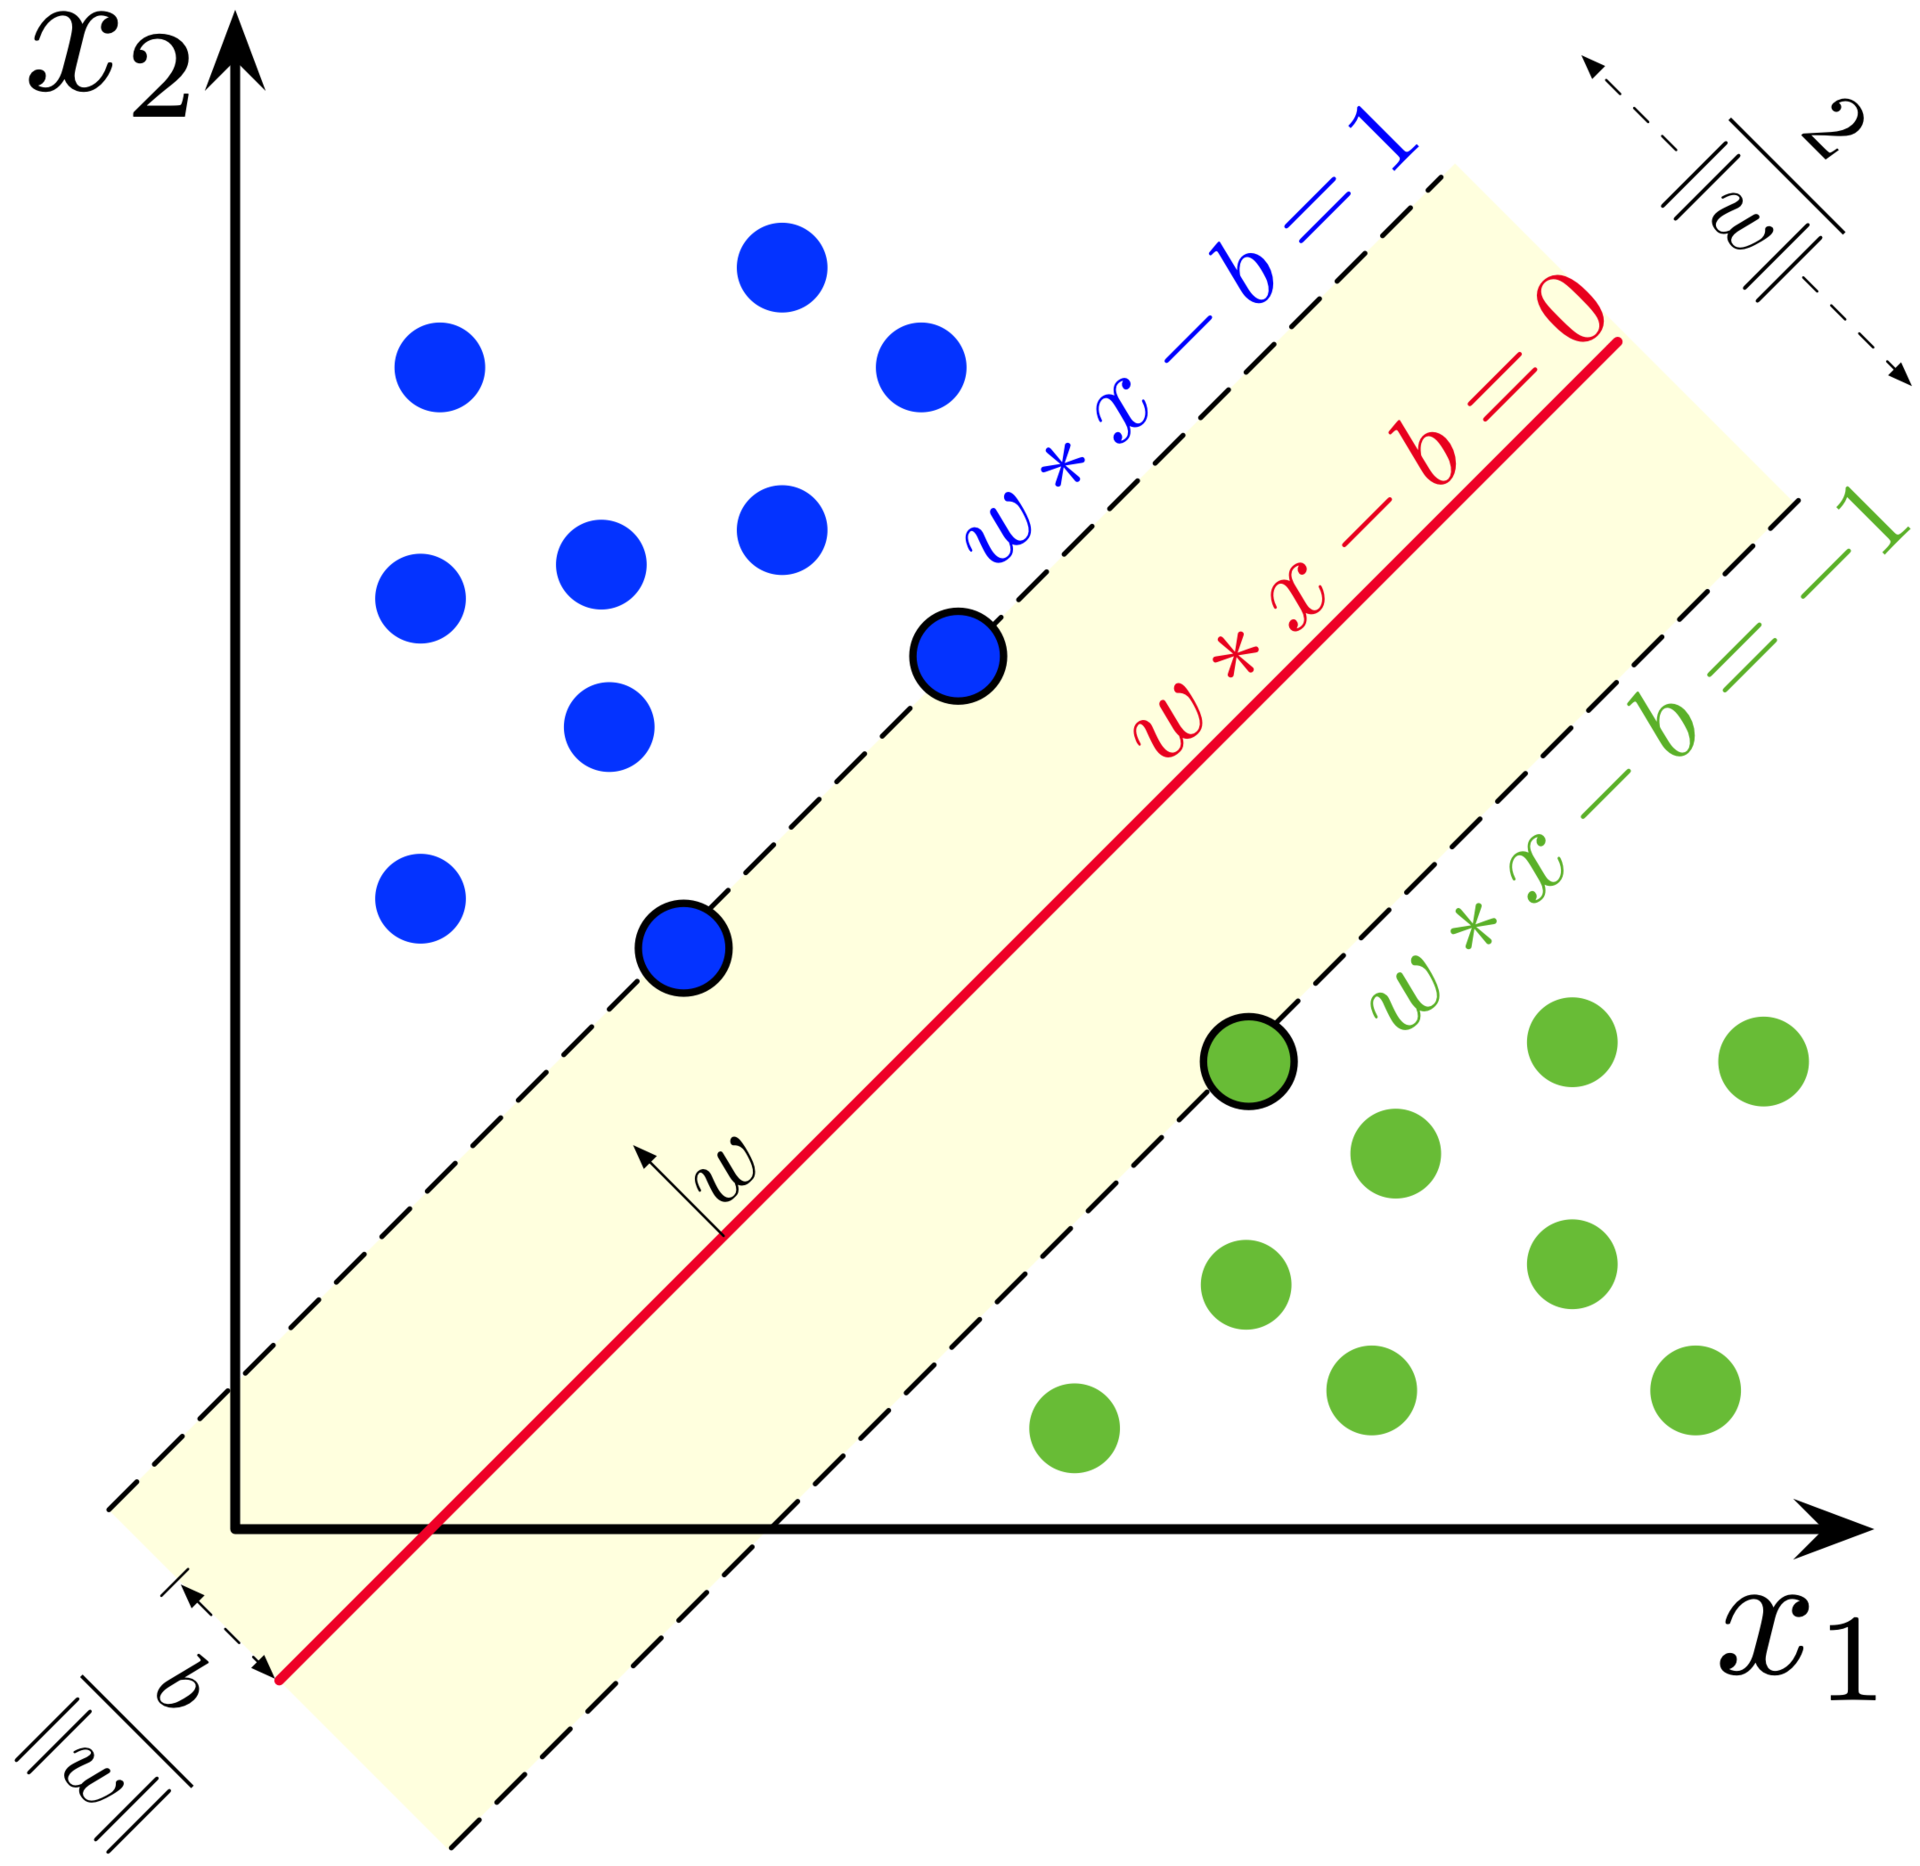
</div>

## Algorithm:

### Training:

1. **Input Data**: Receive input data consisting of features ($X$) and corresponding class labels ($y$).
2. **Feature Transformation (if needed)**: Perform feature transformation to map data into a higher-dimensional space, allowing for better separation of classes.
3. **Kernel Selection**: Choose an appropriate kernel function ($K$) to compute the dot product between data points in the transformed space. Common kernel functions include:
   - Linear Kernel: $K(x_i, x_j) = x_i^T x_j$
   - Polynomial Kernel: $K(x_i, x_j) = (x_i^T x_j + c)^d$
   - Radial Basis Function (RBF) Kernel: $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$
   - Sigmoid Kernel: $K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c)$
4. **Parameter Tuning**: Adjust parameters like the regularization parameter $C$ and kernel parameters to optimize the SVM model's performance.
5. **Optimization**: Formulate and solve the optimization problem to find the hyperplane that maximizes the margin between classes while minimizing classification errors.

### Prediction:

1. **Input Test Data**: Receive input test data points.
2. **Feature Transformation (if applicable)**: Transform test data points using the same transformation applied during training.
3. **Prediction**: Classify test data points by determining which side of the hyperplane they belong to based on their transformed features.

## Important Points:

- **Margin**: SVM aims to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class. The margin ($\rho$) can be calculated as:
  $$\rho = \frac{2}{\|w\|}$$
  where $w$ is the weight vector of the hyperplane.

- **Kernel Trick**: SVM can efficiently handle non-linear decision boundaries in the input space by transforming data into a higher-dimensional feature space using kernel functions.

- **Regularization**: The regularization parameter $C$ controls the trade-off between maximizing the margin and minimizing the classification errors. The objective function to minimize during training is:
  $$\min_{w,b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i$$
  where $\xi_i$ are slack variables representing the classification errors.

- **Support Vectors**: Support vectors are the data points that lie closest to the hyperplane and influence its position and orientation. These points determine the margin and are crucial for the SVM model's decision boundary.

- **Kernel Parameters**:
  - $d$ and $c$ for Polynomial Kernel.
  - $\gamma$ for RBF Kernel.
  - $\alpha$ and $c$ for Sigmoid Kernel.


# Support Vector Machine (SVM) Classification

## Definition:

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. In the context of classification, SVM aims to find the optimal hyperplane that best separates the data points belonging to different classes.

## Algorithm:

### Training:

1. **Input Data:** Receive input data consisting of features (\(X\)) and corresponding class labels (\(y\)).
2. **Feature Transformation (if needed):** Perform feature transformation to map data into a higher-dimensional space, allowing for better separation of classes.
3. **Kernel Selection:** Choose an appropriate kernel function (\(K\)) to handle non-linear separable data if necessary. Common choices include:
   - **Linear Kernel:** \( K(x_i, x_j) = x_i^T x_j \)
   - **Polynomial Kernel:** \( K(x_i, x_j) = (x_i^T x_j + c)^d \)
   - **Radial Basis Function (RBF) Kernel:** \( K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2) \)
   - **Sigmoid Kernel:** \( K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c) \)

### Testing:

1. **Input Test Data:** Receive input test data with features (\(X_{\text{test}}\)).
2. **Prediction:** Using the trained model, predict the class labels for the test data.

### Evaluation:

1. **Performance Metrics:** Evaluate the performance of the model using appropriate metrics such as accuracy, precision, recall, F1-score, etc.


In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Working with Perfectly Linear Dataset

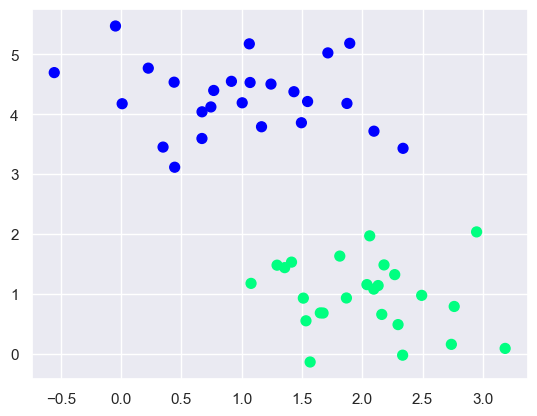

In [13]:
from sklearn.datasets import make_blobs
#from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

In [14]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [15]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

## The importance of Support Vectors

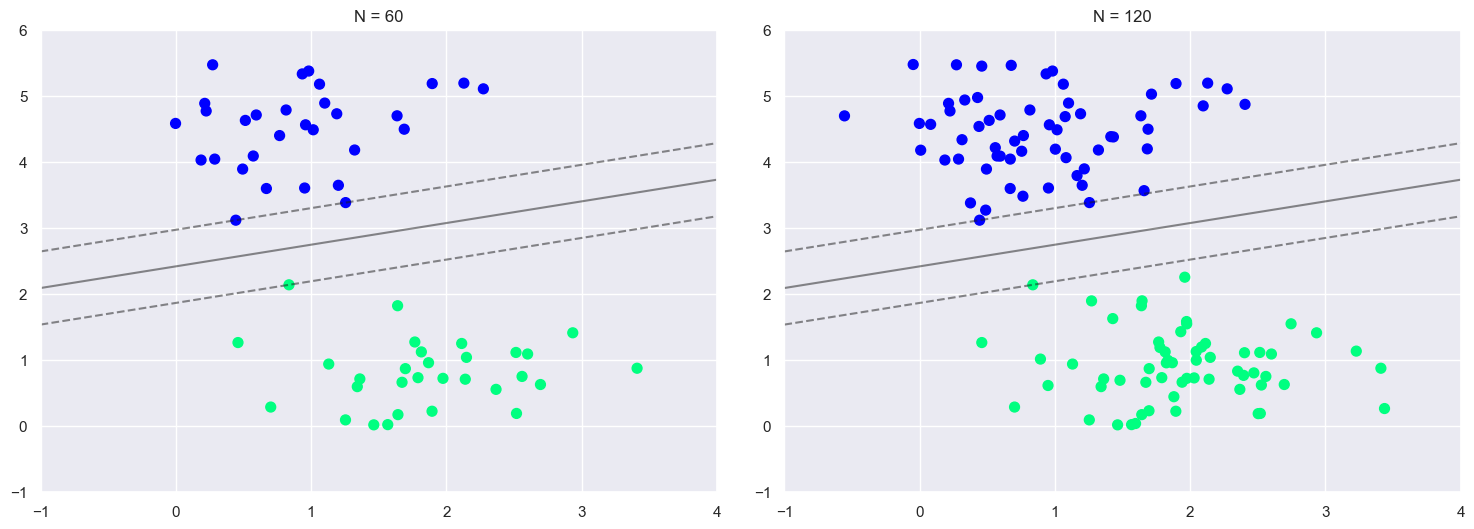

In [16]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Working with Almost Linearly Separable Dataset

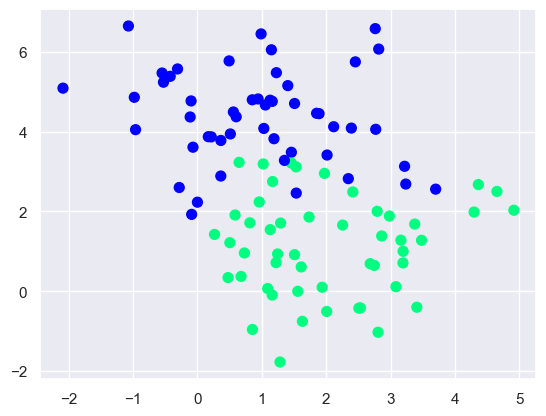

In [17]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

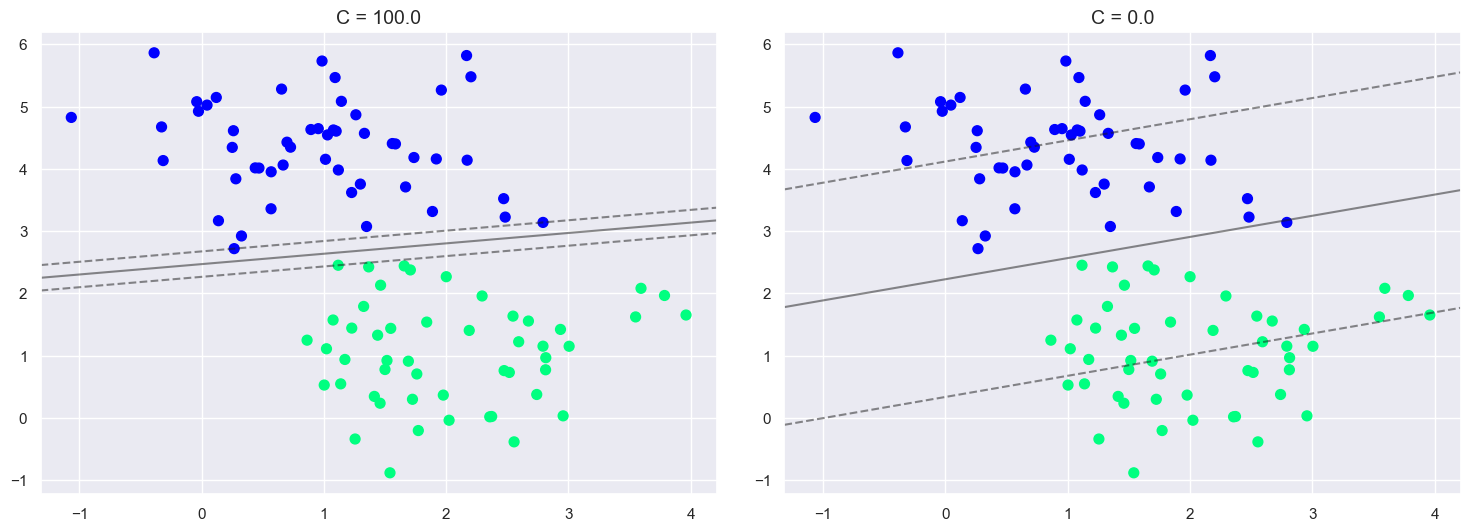

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)